<a href="https://colab.research.google.com/github/gerardbullock/gerardbullock.github.io/blob/main/Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 trend analysis in sample superstore dataset with regression analysis

In [ ]:
# Import libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
%matplotlib inline
import statsmodels.api as sm

# Load the dataset
df = pd.read_excel('/content/Sample - Superstore.xls')#, index_col='Order Date', parse_dates=True)
df.head(2)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country/Region,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,US-2019-103800,2019-01-03,2019-01-07,Standard Class,DP-13000,Darren Powers,Consumer,United States,Houston,...,77095,Central,OFF-PA-10000174,Office Supplies,Paper,"Message Book, Wirebound, Four 5 1/2"" X 4"" Form...",16.448,2,0.2,5.5512
1,2,US-2019-112326,2019-01-04,2019-01-08,Standard Class,PO-19195,Phillina Ober,Home Office,United States,Naperville,...,60540,Central,OFF-BI-10004094,Office Supplies,Binders,GBC Standard Plastic Binding Systems Combs,3.540,2,0.8,-5.4870


In [ ]:
# Next, resample the data by month and calculate the sum of sales for each month:
monthly_sales = df['Sales'].resample('M').sum()

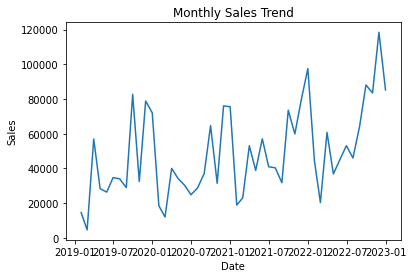

In [ ]:
# Create a line graph of monthly sales
plt.plot(monthly_sales)
plt.title('Monthly Sales Trend')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.show()

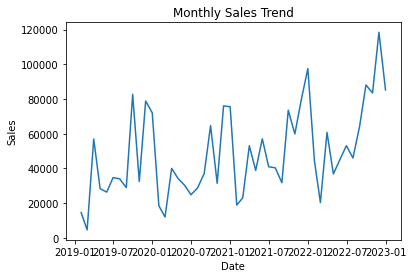

In [ ]:
df['Order Date'] = pd.to_datetime(df['Order Date'], format='%m/%d/%Y')
df_monthly_sales = df.groupby(pd.Grouper(key='Order Date', freq='M')).agg({'Sales': 'sum'}).reset_index()

plt.plot(df_monthly_sales['Order Date'], df_monthly_sales['Sales'])
plt.xlabel("Date")
plt.ylabel("Sales")
plt.title("Monthly Sales Trend")
plt.show()


In [ ]:
X = sm.add_constant(df_monthly_sales.index)
model = sm.OLS(df_monthly_sales['Sales'], X)
results = model.fit()
print(results.summary())


                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.252
Model:                            OLS   Adj. R-squared:                  0.236
Method:                 Least Squares   F-statistic:                     15.50
Date:                Fri, 24 Mar 2023   Prob (F-statistic):           0.000277
Time:                        18:38:57   Log-Likelihood:                -547.50
No. Observations:                  48   AIC:                             1099.
Df Residuals:                      46   BIC:                             1103.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2.705e+04   6314.893      4.284      0.0

trend analysis and clustering analysis using the Sample Superstore dataset in Python:

In [ ]:
# Import libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
%matplotlib inline

In [ ]:
# Load the dataset
df = pd.read_excel('/content/Sample - Superstore.xls')#, index_col='Order Date', parse_dates=True)
df.head(2)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country/Region,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,US-2019-103800,2019-01-03,2019-01-07,Standard Class,DP-13000,Darren Powers,Consumer,United States,Houston,...,77095,Central,OFF-PA-10000174,Office Supplies,Paper,"Message Book, Wirebound, Four 5 1/2"" X 4"" Form...",16.448,2,0.2,5.5512
1,2,US-2019-112326,2019-01-04,2019-01-08,Standard Class,PO-19195,Phillina Ober,Home Office,United States,Naperville,...,60540,Central,OFF-BI-10004094,Office Supplies,Binders,GBC Standard Plastic Binding Systems Combs,3.540,2,0.8,-5.4870


In [ ]:
# Convert the Order Date column to a datetime format
df['Order Date'] = pd.to_datetime(df['Order Date'])

In [ ]:
# Group the data by month and calculate the sum of sales
monthly_sales = df.groupby(pd.Grouper(key='Order Date', freq='M')).agg({'Sales': 'sum'}).reset_index()

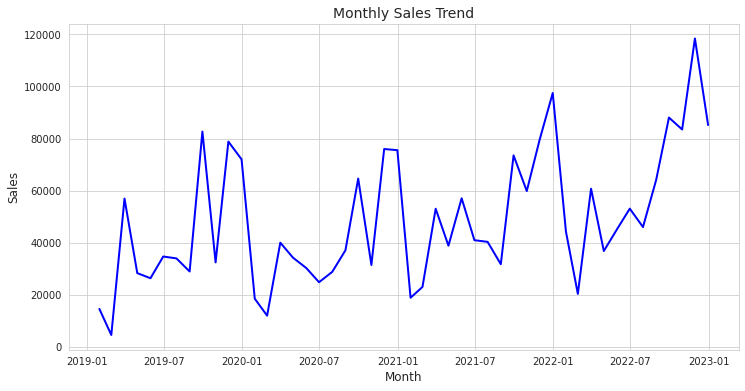

In [ ]:
# Create a line plot to visualize the trend in sales over time
sns.set_style("whitegrid")
plt.figure(figsize=(12,6))
plt.plot(monthly_sales['Order Date'], monthly_sales['Sales'], color='b', linewidth=2)
plt.title('Monthly Sales Trend', fontsize=14)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Sales', fontsize=12)
plt.show()

In [ ]:
# Perform clustering analysis to identify customer segments
X = df[['Sales', 'Quantity']]
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)
df['Cluster'] = kmeans.predict(X)

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


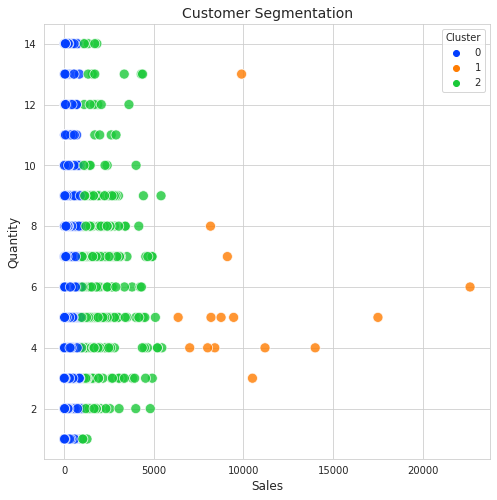

In [ ]:
# Visualize the clusters using a scatter plot
sns.set_style("whitegrid")
plt.figure(figsize=(8,8))
sns.scatterplot(data=df, x='Sales', y='Quantity', hue='Cluster', palette='bright', alpha=0.8, s=100)
plt.title('Customer Segmentation', fontsize=14)
plt.xlabel('Sales', fontsize=12)
plt.ylabel('Quantity', fontsize=12)
plt.show()

In this example, we first load the Sample Superstore dataset and convert the Order Date column to a datetime format. We then group the data by month and calculate the sum of sales to visualize the trend in sales over time using a line plot.

Next, we perform clustering analysis on the dataset to identify customer segments using the KMeans algorithm with three clusters. We then visualize the clusters using a scatter plot, with Sales on the x-axis and Quantity on the y-axis, and color-coded by cluster.

This analysis can help identify trends in sales over time and customer segments based on purchase behavior, which can inform business decisions and marketing strategies.